# 1. Abstract

Machine learning(ML) has various success stories in Medical science and Research. The main purpose of this report is to analyse the data obtained and create a Neural Network Model to predict whether the person has heart disease or not. The features set in a data has been tested for correlation to the heart disease. The values for the various features were tested to suit the neural network model. Based on various hyperparameter of the modelling algorithm, five different models are created and evaluated using ROC AUC evaluation technique to select best out of those five models. The best model came out with 98% accuracy which means there is still 2% chances that model can predict wrong. However, with 98% accuracy, the model can be used to assist medical personel to predict people with heart disease.   


# 2. Question

#### 1. How can the Analysis be helpful in diagnosing people with heart disease?

#### 2. How accurately the the diagnostic tool can diagnose the heart disease?

**Data Source:** [Kaggle:Heart Disease Dataset](https://www.kaggle.com/johnsmith88/heart-disease-dataset)

### Key Stakeholders:
The insight of this analysis will be helpful to Department of Health, Hospital, Health workers and general public.Hence, they are the key stakeholders.


### Significance:
It is very much viatal to keep our heart healthy to maintain rest of our body organ functioning well and more importantly to be alive. Hence, it is very much important to keep up-to-date about the health of the heart. According to the research, heart disease can be caused due to improper exercise technique as well as not doing any exercise. heart disease can also depends on food habit. Hence, it having a tool to diagnose a heart is requiremt for everyone.  


# 3. Data Analysis

The features in the dataset is analysed how they are correlated to the heart disease. Those featueres that are not related to heart disease are discarded. The values for each features are checked if present or not. The relation between the features and features with target(if heart disease or not)variable are visualized to draw a meaningful insight about the data. Eventually, using advance technique, a model is created, analysed, optimised and evaluated. 

### 3.1 Importing Libraries and creating Pandas' dataframe

In [239]:
#importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [80]:
#creating pandas data frame from dataset_heart.csv
heart_df=pd.read_csv('dataset_heart.csv')
heart_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


### Description of features/variables in the dataframe.

Data contains; <br>

* age - age in years <br>
* sex - (1 = male; 0 = female) <br>
* cp - chest pain type <br>
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br>
* chol - serum cholestoral in mg/dl <br>
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
* restecg - resting electrocardiographic results <br>
* thalach - maximum heart rate achieved <br>
* exang - exercise induced angina (1 = yes; 0 = no) <br>
* oldpeak - ST depression induced by exercise relative to rest <br>
* slope - the slope of the peak exercise ST segment <br>
* ca - number of major vessels (0-3) colored by flourosopy <br>
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
* target - have disease or not (1=yes, 0=no)

### 3.2  Lets have a look into the dataframe

In [4]:
# dimension of the dataframe
heart_df.shape

(1025, 14)

In [5]:
# collecting information about the data in a dataframe
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


None of the values are missing in our dataset. 

In [6]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [242]:
# Checking the percentage distribution of target variable.
heart_df['target'].value_counts(normalize=True)*100

1    51.317073
0    48.682927
Name: target, dtype: float64

The percentage distribution of the target variable is almost equal. which is very good for creating a model for predective modelling.

### 3.3 lets visualize and draw some insight from the data.

#####  3.3.1 Let's visualize our target variable to see how heart disease number are distributed in our dataset.

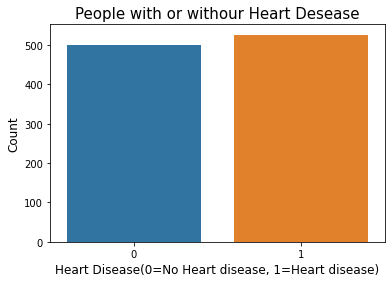

In [21]:
gr=sns.countplot(heart_df['target'])
gr.axes.set_title("People with or withour Heart Desease",fontsize=15)
gr.set_xlabel('Heart Disease(0=No Heart disease, 1=Heart disease)', fontsize=12)
gr.set_ylabel('Count', fontsize=12)
plt.show()

Our dataset has almost equal distribution of heart disease and wihout heart disease number.

##### 3.3.2 Lets find out how the variables/features are correlated to the heart diesease /target variable

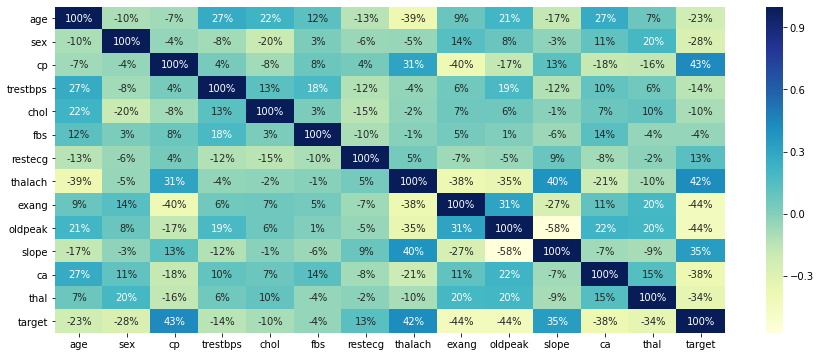

In [84]:
plt.figure(figsize=(15,6))
sns.heatmap(heart_df.corr(),annot=True,fmt='.0%',cmap="YlGnBu")

Hence, we can see that the positively correlated variables are: cp, restecg,thalach and slope and rest are negatively correlated to the target(heart disease) variable. The high percentage of positively correlated are cp, thalach and slope. we can visualize some of the negatively and positively correlated features. 

##### 3.3.3 Lets look at the relation of heart desease with age which is -23% negatively correlated.
 

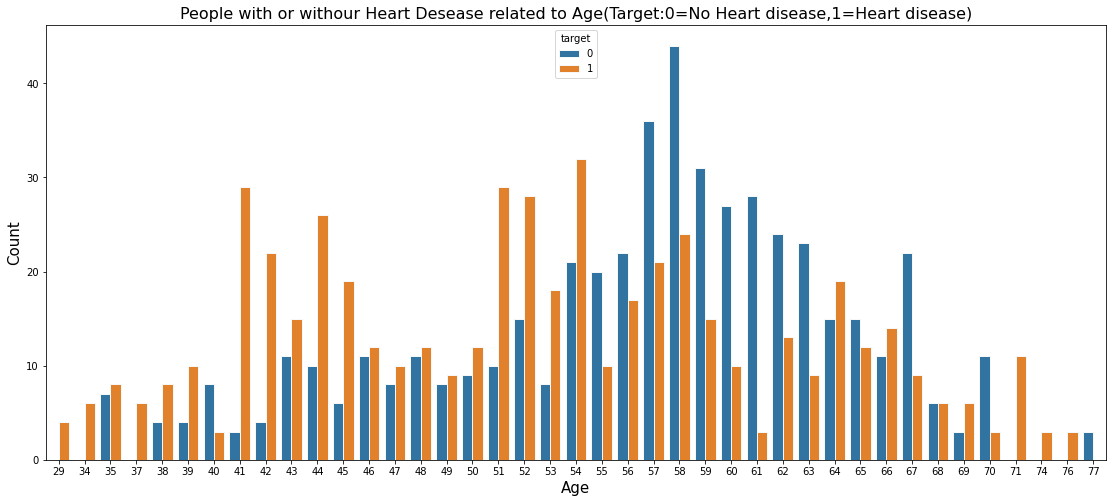

In [243]:
plt.figure(figsize=(19,8))
gr=sns.countplot(x='age', hue='target',data=heart_df,edgecolor=sns.color_palette('RdBu', n_colors=1))
gr.axes.set_title("People with or withour Heart Desease related to Age(Target:0=No Heart disease,1=Heart disease)",fontsize=16)
gr.set_xlabel('Age', fontsize=15)
gr.set_ylabel('Count', fontsize=15)
plt.show()

It shows that heart disease can be found on almost all age group. However, the interesting fact that our data shows is that the heart diseasee has outnumbered the non-heart disease between the age 29 and 54 which indicates that chances of heart disease is very high at this age group. At the same time, it also shows that between the age of 55 and 67, the chances of heart disease is relatively low. 

##### 3.3.4 Lets look into the data on how heart disease is based on chest Pain which is 43% correlated.

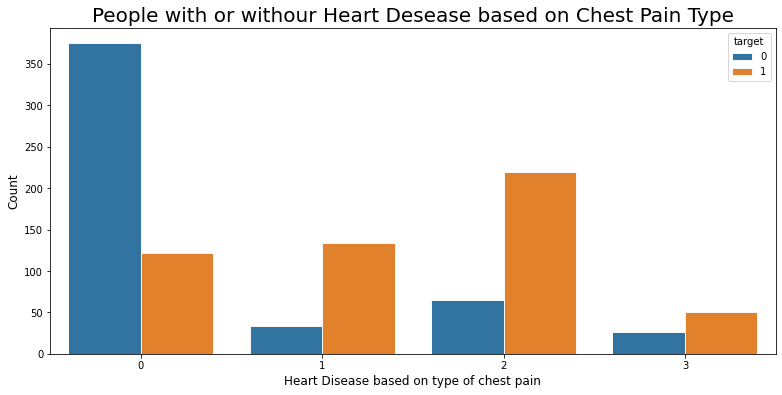

In [241]:
plt.figure(figsize=(13,6))
gr=sns.countplot(x='cp', hue='target',data=heart_df,edgecolor=sns.color_palette('RdBu', n_colors=1))
gr.axes.set_title("People with or withour Heart Desease based on Chest Pain Type",fontsize=20)
gr.set_xlabel('Heart Disease based on type of chest pain', fontsize=12)
gr.set_ylabel('Count', fontsize=12)
plt.show()

The above graph indicates that Type 2 chest pain has higher probability of heart disease whereas type 1 and 3 is also relatively significant to heart disease compared to non-heart disease. However, type 0 is relatively less prone to heart disease compared to non-heart disease.

##### 3.3.5 Let's look into the relation between Heart beat rate( thalach ) and Age.

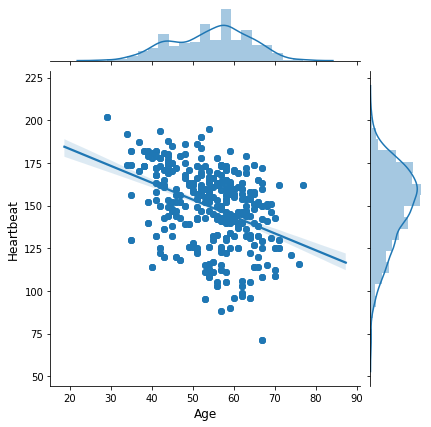

In [248]:
gr = (sns.jointplot('age', 'thalach',data=heart_df, kind='reg')

        .set_axis_labels('Age', 'Heartbeat', fontsize=12))


It indicates that heart bit decreases with increase in age. which is true as per the indication of correlation graph.

##### 3.3.6 Let's Look into the relation between chest Pain and heart bit.

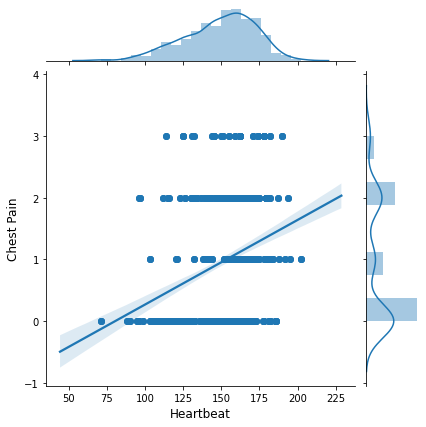

In [246]:
gr = (sns.jointplot('thalach', 'cp',data=heart_df, kind='reg')

        .set_axis_labels('Heartbeat', 'Chest Pain', fontsize=12))


The relation between chest pain and heartbeat indicates that type 1 and 2 has more greater heartbeat rate. which again reiterates that type 1 and 2 chest pain are more likely to have heart disease. overall, chest pain causes heartbeat to increase.

##### 3.3.7 Let's observe how cholestrol is related to heart beat and eventually to heart disease

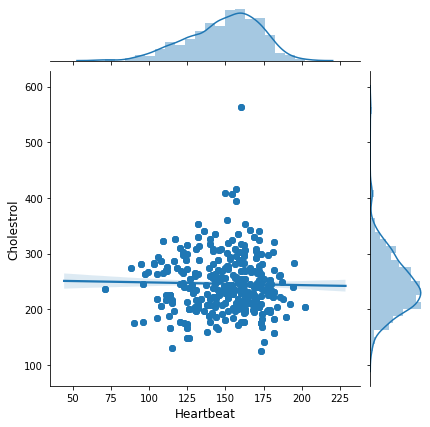

In [250]:
gr = (sns.jointplot('thalach', 'chol',data=heart_df, kind='reg')

        .set_axis_labels('Heartbeat', 'Cholestrol', fontsize=12))

So, we can observe from the above relation that Heartbeat also increases with decrease in cholestrol. 

##### 3.3.8 Let's finally visualize the relation between heart beat(thalach) and heart dieseae(target)

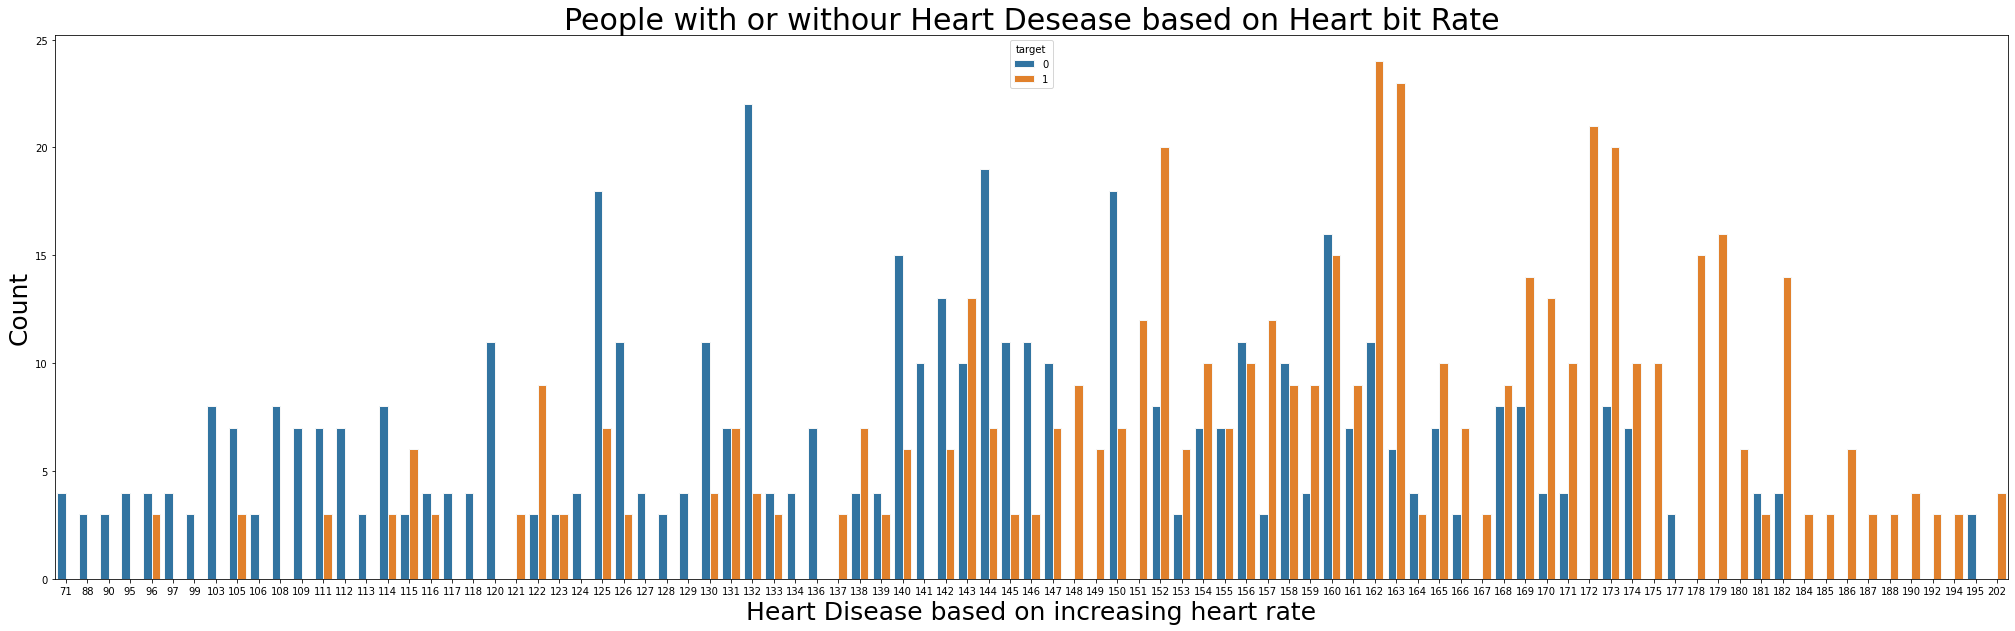

In [97]:
plt.figure(figsize=(35,10))
gr=sns.countplot(x='thalach', hue='target',data=heart_df,edgecolor=sns.color_palette('RdBu', n_colors=1))
gr.axes.set_title("People with or withour Heart Desease based on Heart bit Rate",fontsize=30)
gr.set_xlabel('Heart Disease based on increasing heart rate', fontsize=25)
gr.set_ylabel('Count', fontsize=25)
plt.show()

As suggested by the above graph, heartbeat above 151 is highly prone to Heart disease. which means increase in heartbeat is prone to heart disease.

### 3.4 General Insight 

1. Heart disease can be found on any age group. 
2. Chest pain symtoms more likely to suggest about the heart disease.
3. Heartbeat decreases with growing age but ther is still chances of heart disease. 
4. Heart disease is more prominent with heartbeat above 151.

# 4.0 Detailed Analysis

### 4.1 Build a Neural Network model

We saw enough visual about various factor related to heart disease. Let's use this data to train the Model with optimal accuracy so that the model can help us predict whether a person has heart disease or not. we will create Neural Network Model.

##### 4.1.1  Data Preprocessing:

**Let's run through the checklist below to make sure whether we need to process the data suitable to our Model**

1. Check if there is any repeated variable and variable with missing values.
2. Identifying catagorical variable and convering them into binary or integer value.
3. Check the distribution of target variable if they are nearly or almost equally distributed.
4. split the data into training and test set.
5. check whether the data is scaled/standardised.

After checking and confirming above first 2 criteria are not required based on our data set. The 3rd criteria is already checked and its almost equally distributed(51% heart disease and 49% no heart disease).  we move on to the 4th criteria which is spliting the data into training and test set and then successively to 5th.

In [99]:
#The convention in Python is to assign input variables as X and target as y.
#In our case, y would be target and X would be the rest of the input variables.
y=heart_df['target']
X=heart_df.drop(['target'], axis=1)

In [102]:
#input variable X is still the pandas data frame so we have to convert into numpy matrix required for sklearn.
# we are using 30% as a test size indicated by0.3.
#stratify to ensure same ratio of positive and negative target in both train and test data set.
#random state for generating pseudo-random number.
X_train, X_test, y_train, y_test=train_test_split(X.to_numpy(), y,\
                                                  test_size=0.3, stratify=y,random_state=100,shuffle=True)

#### 4.1.2 Standarization of training and test data
Our model is sensetive to input variable with different scale.Due to the negative impact on **gradient descent** which causes to suboptimal performance of the model, we require to make sure our mean is 0 and standard deviation is 1 for the input variable.  

In [126]:
#Initlizing the standardscalar object
scaler=StandardScaler()
# visualise min, max, mean and standard dev of data before scaling
print("Before scaling\n-------------")
for i in range(3):
    col=X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}"
          .format(i, min(col), max(col), np.mean(col), np.std(col)))
    
#lets scale the training data now.

X_train_sc=scaler.fit_transform(X_train, y_train)

# visualise min, max, mean and standard dev of data after scaling
print("\nAfter scaling\n-------------")
for i in range(3):
    col=X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}"
          .format(i, min(col), max(col), np.mean(col), np.std(col)))
    
#Let's transform the test data from the using the statistic learned by training data
X_test_sc=scaler.transform(X_test)

Before scaling
-------------
Variable #0: min -2.823263928104541, max 2.489517052246812, mean 0.00 and std dev 1.00
Variable #1: min -1.528032630846037, max 0.6544362861193184, mean -0.00 and std dev 1.00
Variable #2: min -0.9344453488533665, max 1.9955720642422476, mean -0.00 and std dev 1.00

After scaling
-------------
Variable #0: min -2.823263928104541, max 2.489517052246812, mean 0.00 and std dev 1.00
Variable #1: min -1.528032630846037, max 0.6544362861193184, mean -0.00 and std dev 1.00
Variable #2: min -0.9344453488533665, max 1.9955720642422476, mean -0.00 and std dev 1.00


The After scaling data shows that the mean is 0 and standard deviation is 1 which indicates that the scaling is performed well. 

#### 4.1.3 Let's Build the Model with all default hyperparameters apart from randon state which is choosen to be 101.

The Default Hyperparameters are:

MLPClassifier( activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,

              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              
              hidden_layer_sizes=(100,), learning_rate='constant',
              
              learning_rate_init=0.001, max_fun=15000, max_iter=700,
              
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              
              power_t=0.5, random_state=10, shuffle=True, solver='adam',
              
              tol=0.0001, validation_fraction=0.1, verbose=False,
              
              warm_start=False)

In [169]:
#lets build the model just by changin random_state to 101 and leaving all hyperparameters as default

hrt_model_1=MLPClassifier(random_state=101)
hrt_model_1.fit(X_train_sc, y_train)


C:\Users\Moktanaj\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(random_state=101)

The warning indicates that the Maximum iterations (200) which is the default value is not enough to reach the convergence. Hence, we will try to increase it by 500 in next model.

#### 4.1.4  Let's check the Training and Test accuracy of the model called hrt_model_1.

In [170]:
print("Train accuracy:", hrt_model_1.score(X_train_sc, y_train))
print("Test accuracy:", hrt_model_1.score(X_test_sc, y_test))

y_pred=hrt_model_1.predict(X_test_sc)
print(classification_report(y_test, y_pred))


Train accuracy: 0.9902370990237099
Test accuracy: 0.935064935064935
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       150
           1       0.92      0.96      0.94       158

    accuracy                           0.94       308
   macro avg       0.94      0.93      0.93       308
weighted avg       0.94      0.94      0.93       308



Train accuracy could not reach 100% and Test accuracy is well below as well. There is still some error in the model. we will further build the model 'hrt_model_2' with max_iter=500 to make sure convergence is reached.

### 4.2 Let's rebuild another model with max_iter=500.

In [171]:
#buliding model with max_iter=500 and random_state =101 which is same as before.
hrt_model_2=MLPClassifier(max_iter=500, random_state=101)
hrt_model_2.fit(X_train_sc, y_train)

# Let's print and check the training and testing accuracy of the model.

print("Train accuracy:", hrt_model_2.score(X_train_sc, y_train))
print("Test accuracy:", hrt_model_2.score(X_test_sc, y_test))

# Let's have a look at the classification report of our model.
y_pred=hrt_model_2.predict(X_test_sc)
print(classification_report(y_test, y_pred))

# Let's also have a look on the hyperparameters that has been changed on default.
print(hrt_model_2)

Train accuracy: 1.0
Test accuracy: 0.9772727272727273
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       150
           1       0.96      1.00      0.98       158

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

MLPClassifier(max_iter=500, random_state=101)


The model still has not got the 100% testing accuracy although it has been reached the convergence and 100% training accuracy. Hence, we will try to improve the model further by tuning the hyperparameter with GridSearchCV. 

### 4.3 Further optimising the model by optimizing  hyperparameter "hidden_layer_sizes" with GridSearchCV

Hidden_layer_sizes: Bsed on the official defination,it is a tuple with default=(100,).
The i th element represents the number of neurons in the i-th hidden layer.

Also, Regarding the number of nurons in each layer, it is best to have the number between input variable/features and the outpur variable. Let's have a look into the input features.   
    

In [159]:
# checking the number of input variables/features
print(X_train_sc.shape)

(717, 13)


we have 13 variables/features. Hence, we can have 4 hidden layers with 3 to 12 neurons with increment of 3 neurons on successive layer. 

#### 4.3.1 Let's create a model called 'heart_medol_cv_1' by tuning 'hidden_layer_sizes' Hyperparameter

In [185]:
#defining the hidden_layer_size hyperparameter for GridSearchCV
hidden_layer_para = {'hidden_layer_sizes': [(x,) for x in range(3, 13, 3)]}

# applying the hidden_layer_size hyperparameter and creating model heart_medol_cv_1
heart_medol_cv_1 = GridSearchCV(param_grid=hidden_layer_para, estimator=MLPClassifier(random_state=101, max_iter=500),return_train_score=True, cv=10, n_jobs=-1)
heart_medol_cv_1.fit(X_train_sc, y_train)

#printing Trining and Test accuracy of the model 'heart_medol_cv_1'
print("Train accuracy:", heart_medol_cv_1.score(X_train_sc, y_train))
print("Test accuracy:", heart_medol_cv_1.score(X_test_sc, y_test))

#checking the predicted result. 
y_pred = heart_medol_cv_1.predict(X_test_sc)
print(classification_report(y_test, y_pred))

print(heart_medol_cv_1.best_params_)

Train accuracy: 0.9288702928870293
Test accuracy: 0.8766233766233766
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       150
           1       0.85      0.92      0.88       158

    accuracy                           0.88       308
   macro avg       0.88      0.88      0.88       308
weighted avg       0.88      0.88      0.88       308

{'hidden_layer_sizes': (12,)}


C:\Users\Moktanaj\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The training and test accuracy has gone further down compated to 'hrt_model_2'. Hence, we need further tuning to get the optimal hyperparameter. Howerver, the best hidden layer size is advised to be 12.

### 4.4 Let's create a model called 'heart_medol_cv_2' by tuning 'alpha' Hyperparameter and leaving all other hyperparameters same as above.

Alpha is difined as a learning rate for gradient descent algorithm. alpha higher than default value (0.00001) means the gradient descent will take larger stpe and train faster but there is a chances of missing an optimal solution. On the other hand, alpha smaller than default value makes gradient descent to take smaller step but might end up with local minimum.

In [202]:
#defining the hyperparameter for 'hidden_layer_size' with same as previous and 'alpha' for GridSearchCV 
hidden_layer_para = {'hidden_layer_sizes': [(x,) for x in range(3, 13, 3)],'alpha': [0.01,0.001, 0.0001, 0.00001]}

## applying the hidden_layer_size hyperparameter and creating model heart_medol_cv_2
heart_medol_cv_2 = GridSearchCV(param_grid=hidden_layer_para, estimator=MLPClassifier(random_state=101, max_iter=500),return_train_score=True, cv=10, n_jobs=-1)
heart_medol_cv_2.fit(X_train_sc, y_train)

# printing the training and testing accuracy.
print("Train accuracy:", heart_medol_cv_2.score(X_train_sc, y_train))
print("Test accuracy:", heart_medol_cv_2.score(X_test_sc, y_test))

#printing output predection.
y_pred = heart_medol_cv_2.predict(X_test_sc)
print(classification_report(y_test, y_pred))

print(heart_medol_cv_2.best_params_)

Train accuracy: 0.9288702928870293
Test accuracy: 0.8766233766233766
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       150
           1       0.85      0.92      0.88       158

    accuracy                           0.88       308
   macro avg       0.88      0.88      0.88       308
weighted avg       0.88      0.88      0.88       308

{'alpha': 0.001, 'hidden_layer_sizes': (12,)}


C:\Users\Moktanaj\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


It shows that Gridsearch has returned the alpha value as 0.001 and number of neurons in hidden layer 12 as an optimal hyperparameter. However, the train and test accuracy still not better than hrt_model_2.

### 4.5 Let's now build the model 'heart_medol_cv_3'with optimal hyperparameter and max_iter=1500 so that the the model reaches the convergence.

In [209]:
#defining the hyperparameter for 'hidden_layer_size' with same as previous and 'alpha' for GridSearchCV 
hidden_layer_para = {'hidden_layer_sizes': [(12,)],'alpha': [0.001],'solver':['adam']}

## applying the hidden_layer_size hyperparameter and creating model heart_medol_cv_2
heart_medol_cv_3 = GridSearchCV(param_grid=hidden_layer_para, estimator=MLPClassifier(random_state=101, max_iter=1500),return_train_score=True, cv=10, n_jobs=-1)
heart_medol_cv_3.fit(X_train_sc, y_train)

# printing the training and testing accuracy.
print("Train accuracy:", heart_medol_cv_3.score(X_train_sc, y_train))
print("Test accuracy:", heart_medol_cv_3.score(X_test_sc, y_test))

#printing output predection.
y_pred = heart_medol_cv_3.predict(X_test_sc)
print(classification_report(y_test, y_pred))

print(heart_medol_cv_3.best_params_)

Train accuracy: 0.99581589958159
Test accuracy: 0.9577922077922078
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       150
           1       0.94      0.97      0.96       158

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308

{'alpha': 0.001, 'hidden_layer_sizes': (12,), 'solver': 'adam'}


we can see that the model has reached the convergence with max_iter=1500. The training and testing result shows the better result than its previous two 
predecessor with optimal hyperparameter but yet failed to triumph the result of 'hrt_model_2'.


### 5. Summarizing all the model created


| S.N | Model Name | Train accu. | Test accu. | Accuracy |
| --- | --- | --- | --- | ---  | 
| 1 | hrt_model_1 | 0.99 | 0.93 | 94 |
| 2 | hrt_model_2 | 1.0 | 0.97 | 98 |
| 3 | heart_medol_cv_1 | 0.92 | 0.87 | 88 |
| 4 | heart_medol_cv_2 | 0.92 | 0.87 | 88 |
| 5 | heart_medol_cv_3 | 0.99 | 0.95 | 96 |

### 6.0 Evaluation of the model using ROC 

In [225]:
#lets extract the predicted values from all the model we have created.

y_pred_proba_hrt_model_1 = hrt_model_1.predict_proba(X_test_sc)
y_pred_proba_hrt_model_2 = hrt_model_2.predict_proba(X_test_sc)
y_pred_proba_heart_medol_cv_1 = heart_medol_cv_1.predict_proba(X_test_sc)
y_pred_proba_heart_medol_cv_2 = heart_medol_cv_2.predict_proba(X_test_sc)
y_pred_proba_heart_medol_cv_3 = heart_medol_cv_3.predict_proba(X_test_sc)


#Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores calculated above

roc_index_hrt_model_1 = roc_auc_score(y_test, y_pred_proba_hrt_model_1[:, 1])
roc_index_hrt_model_2 = roc_auc_score(y_test, y_pred_proba_hrt_model_2[:, 1])
roc_index_heart_medol_cv_1 = roc_auc_score(y_test, y_pred_proba_heart_medol_cv_1[:, 1])
roc_index_heart_medol_cv_2 = roc_auc_score(y_test, y_pred_proba_heart_medol_cv_2[:, 1])
roc_index_heart_medol_cv_3 = roc_auc_score(y_test, y_pred_proba_heart_medol_cv_3[:, 1])

# Compute Receiver operating characteristic (ROC) like false positive rate, true positive rate and threshold
# related to each model.

fpr_hrt_model_1, tpr_hrt_model_1, thresholds_hrt_model_1 = roc_curve(y_test, y_pred_proba_hrt_model_1[:,1])
fpr_hrt_model_2, tpr_hrt_model_2, thresholds_hrt_model_2 = roc_curve(y_test, y_pred_proba_hrt_model_2[:,1])
fpr_heart_medol_cv_1, tpr_heart_medol_cv_1, thresholds_heart_medol_cv_1 = roc_curve(y_test, y_pred_proba_heart_medol_cv_1[:,1])
fpr_heart_medol_cv_2, tpr_heart_medol_cv_2, thresholds_heart_medol_cv_2 = roc_curve(y_test, y_pred_proba_heart_medol_cv_2[:,1])
fpr_heart_medol_cv_3, tpr_heart_medol_cv_3, thresholds_heart_medol_cv_3 = roc_curve(y_test, y_pred_proba_heart_medol_cv_3[:,1])


#### 6.1 Let's Visualize the ROC curve and see which is the best model out of 5 models we have created.

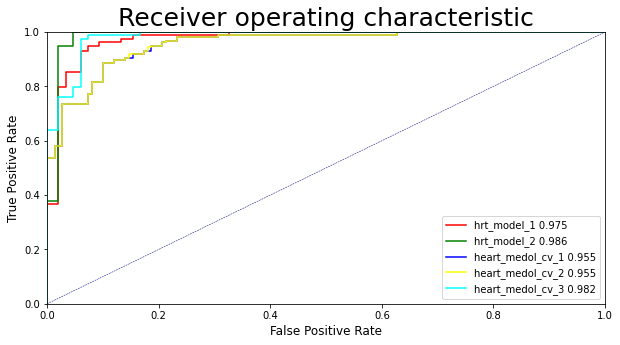

In [236]:
plt.figure(figsize=(10,5))
plt.plot(fpr_hrt_model_1, tpr_hrt_model_1, label='hrt_model_1 {:.3f}'.format(roc_index_hrt_model_1), color='red')
plt.plot(fpr_hrt_model_2, tpr_hrt_model_2, label='hrt_model_2 {:.3f}'.format(roc_index_hrt_model_2), color='green')
plt.plot(fpr_heart_medol_cv_1, tpr_heart_medol_cv_1, label='heart_medol_cv_1 {:.3f}'.format(roc_index_heart_medol_cv_1), color='blue')
plt.plot(fpr_heart_medol_cv_2, tpr_heart_medol_cv_2, label='heart_medol_cv_2 {:.3f}'.format(roc_index_heart_medol_cv_2), color='yellow')
plt.plot(fpr_heart_medol_cv_3, tpr_heart_medol_cv_3, label='heart_medol_cv_3 {:.3f}'.format(roc_index_heart_medol_cv_3), color='cyan')

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('Receiver operating characteristic curve',fontsize=25)
plt.legend(loc="lower right")
plt.show()

Based on the above ROC curve, the best performing models is **hrt_model_2** with ROC index of 0.986 where as model **heart_medol_cv_3** can also be considered best due to its ROC index of 0.982. Also from the visual aspect, those two model covers larger area under their curve and hence, we can colude about their ability.

### 7.0 Insight 

1. 1. Heart disease can be found on any age group. 
2. Chest pain symtoms more likely to suggest about the heart disease.
3. Heartbeat decreases with growing age but ther is still chances of heart disease. 
4. Heart disease is more prominent with heartbeat above 151.
5. Model 'hrt_model_2' is the best performing moedl. However, the model still has almost 2% error which has to be taken into consideration.
6. Model 'heart_medol_cv_3' can also be consider with around 2% error but the downside of this model is its longer iteration process which could be processor as well as memory intensive.